In [2]:
#Bringing in 311 compalint data
import pandas as pd
import numpy as np

complaints = pd.read_csv('Elevator_Complaints.csv')
complaints.shape

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_93617/54663176.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('Elevator_Complaints.csv')


(69751, 38)

In [4]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37998090,12/20/2017 10:26:48 AM,01/08/2018 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,11372.0,34-57 73 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751246,-73.893098,POINT (-73.89309829767902 40.751246265177535)
1,37999153,12/20/2017 10:26:22 AM,12/20/2017 10:26:22 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,11214.0,2036 CROPSEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599543,-74.001873,POINT (-74.00187253346519 40.59954279505366)
2,37974723,12/19/2017 11:40:37 AM,12/20/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,11214.0,2036 CROPSEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599543,-74.001873,POINT (-74.00187253346519 40.59954279505366)
3,37973960,12/19/2017 11:33:30 AM,12/19/2017 11:33:30 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10025.0,915 WEST END AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800768,-73.969198,POINT (-73.96919761842804 40.800768386347244)
4,37972507,12/19/2017 11:31:34 AM,12/22/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10075.0,511 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771848,-73.949383,POINT (-73.94938298933636 40.771848368467545)


In [5]:
#Read in the MTA station data
mta_data = pd.read_csv('/Users/zoeslemmons/Desktop/MTA-elevators/systems_data/MTA_Subway_Stations.csv')
mta_data.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,127,317,611,IRT,Broadway - 7Av,Times Sq-42 St,M,True,1 2 3,Subway,40.755290,-73.987495,Uptown,Downtown,1,1,1,NaN,POINT (-73.987495 40.75529)
1,S17,515,515,SIR,Staten Island,Annadale,SI,False,SIR,Open Cut,40.540460,-74.178217,Ferry,South Shore,0,0,0,NaN,POINT (-74.178217 40.54046)
2,S01,139,627,BMT,Franklin Shuttle,Franklin Av,Bk,False,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,NaN,POINT (-73.955827 40.680596)
3,254,349,349,IRT,Eastern Pky,Junius St,Bk,False,3,Elevated,40.663515,-73.902447,Manhattan,New Lots,0,0,0,NaN,POINT (-73.902447 40.663515)
4,M01,108,108,BMT,Myrtle Av,Middle Village-Metropolitan Av,Q,False,M,Elevated,40.711396,-73.889601,Inbound,Last Stop,1,1,1,NaN,POINT (-73.889601 40.711396)


In [7]:
station_complaints = complaints[complaints['Location'].isin(mta_data['Georeference'])]
station_complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location


In [10]:
#Ok, that shows there are no station complaints in the 311 data. Let's check that by merging them

merged = complaints.merge(mta_data, left_on='Location', right_on='Georeference')
merged

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference


In [11]:
#Ok, I guess there are no station complaints in the 311 elevator compalint data

In [12]:
#Here's another dataset about elevator outages. Let's look at that

data = pd.read_csv('MTA_NYCT_Subway_Elevator_data.csv')
data.head()

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
0,01/01/2015,Queens,Elevator,EL426,2,2,0,0,95.0,1.000000,...,1.000000,124.000000,124.0,0.986022,733.600000,744.0,JUNCTIONBLVD-FLS-7,451,Junction Blvd - Station,451
1,01/01/2015,Queens,Elevator,EL411,6,5,1,0,313.0,0.984677,...,0.981586,121.716667,124.0,0.962522,716.116667,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
2,01/01/2015,Brooklyn,Escalator,ES332,16,3,13,0,1039.0,0.958199,...,0.903360,112.016667,124.0,0.932684,693.916667,744.0,MYRTLE-WYCKOFFAVS-MYT-M,112,"Myrtle-Wyckoff Avs (L,M)",630
3,01/01/2015,Queens,Elevator,EL449X,0,0,0,0,NaN,1.000000,...,1.000000,124.000000,124.0,1.000000,744.000000,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
4,01/01/2015,Manhattan,Escalator,ES239,7,3,4,0,655.0,0.978898,...,0.973790,120.750000,124.0,0.964315,717.450000,744.0,5AV/53ST-QBL-E/M,276,5 Av/53 St - Station,276


In [15]:
data.shape

(73467, 22)

In [33]:
elevator_data = data[data['Equipment Type']=='Elevator']
elevator_data.shape

(39841, 22)

In [34]:
elevator_data.groupby(data.Month)['Unscheduled Outages'].sum()

Month
2015-01-01    459
2015-02-01    457
2015-03-01    499
2015-04-01    411
2015-05-01    402
             ... 
2025-02-01    599
2025-03-01    550
2025-04-01    510
2025-05-01    440
2025-06-01    585
Name: Unscheduled Outages, Length: 126, dtype: int64

In [37]:
elevator_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39841 entries, 0 to 73466
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         39841 non-null  datetime64[ns]
 1   Borough                       39841 non-null  object        
 2   Equipment Type                39841 non-null  object        
 3   Equipment Code                39841 non-null  object        
 4   Total Outages                 39841 non-null  int64         
 5   Scheduled Outages             39841 non-null  int64         
 6   Unscheduled Outages           39841 non-null  int64         
 7   Entrapments                   39841 non-null  int64         
 8   Time Since Major Improvement  34311 non-null  float64       
 9   AM Peak Availability          38714 non-null  float64       
 10  AM Peak Hours Available       39841 non-null  float64       
 11  AM Peak Total Hours           398

In [36]:
elevator_data['Month'] = pd.to_datetime(elevator_data['Month'])

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_93617/1279799750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elevator_data['Month'] = pd.to_datetime(elevator_data['Month'])


In [38]:
outages_per_year = elevator_data.groupby(elevator_data.Month.dt.year)['Unscheduled Outages'].sum().to_frame()

In [39]:
#Just gonna check and make sure I'm getting the right answers here
elevator_data[elevator_data['Month'].dt.year == 2015]['Unscheduled Outages'].sum()

np.int64(5173)

In [24]:
import matplotlib

<Axes: xlabel='Month'>

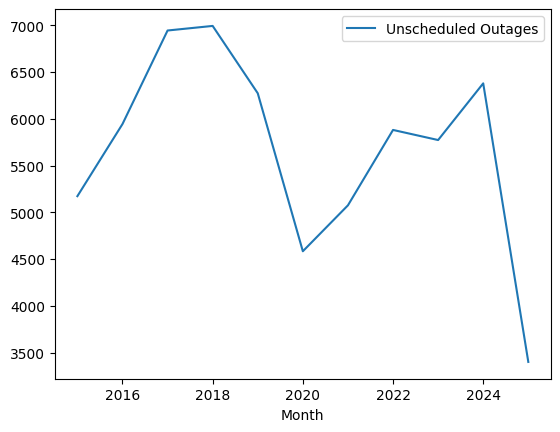

In [41]:
outages_per_year.plot()

In [42]:
outages_per_month = elevator_data.groupby(elevator_data.Month.dt.month)['Unscheduled Outages'].sum().to_frame()
outages_per_month

,Unscheduled Outages
Month,
1,6291
2,5574
3,5424
4,4967
5,5038
6,5263
7,5111
8,5091
9,4772


<Axes: xlabel='Month'>

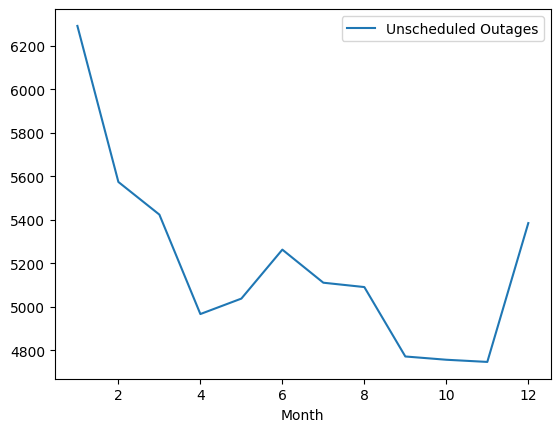

In [43]:
outages_per_month.plot()

In [48]:
elevator_data.groupby(elevator_data['Equipment Code'])['Unscheduled Outages'].sum().sort_values(ascending = False)

Equipment Code
EL710     676
EL108     623
EL601     614
EL113     586
EL281     573
         ... 
EL492X      0
EL491X      0
EL490X      0
EL489X      0
EL791X      0
Name: Unscheduled Outages, Length: 391, dtype: int64

In [50]:
#Where are the elvators with the most outages?
elevator_data[elevator_data['Equipment Code'] =='EL710'].head(1)

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
163,2015-01-01,Manhattan,Elevator,EL710,11,3,8,2,90.0,0.900806,...,0.861828,106.866667,124.0,0.884252,657.883333,744.0,BOWLINGGREEN-LEX-4/5,414,Bowling Green - Station,414


In [51]:
elevator_data[elevator_data['Equipment Code'] =='EL108'].head(1)

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
432,2015-01-01,Manhattan,Elevator,EL108,10,7,3,1,619.0,0.985215,...,0.955914,118.533333,124.0,0.936402,696.683333,744.0,181ST-BWY7-1,301,181 St - Station,301


In [52]:
elevator_data[elevator_data['Equipment Code'] =='EL601'].head(1)

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
4215,2015-09-01,Manhattan,Elevator,EL601,6,2,4,0,NaN,0.976485,...,1.0,68.0,68.0,0.986464,402.033333,407.55,34ST-HUDSONYARDS-FLS-7,471,34 St-Hudson Yards - Station,471
